In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV test data separetly into a DataFrame
data1 = pd.read_csv('results/re_aigenerated_5_experiment_1689897160829.csv')
data2 = pd.read_csv('results/2_aigenerated_5_experiment_1690130782971.csv')
data3 = pd.read_csv('results/3_aigenerated_5_experiment_1691838746387.csv')
# Concatenate the two test data
df = pd.concat([data1, data2, data3], ignore_index=True)
df

,llm_model,temperature,system_prompt,user_prompt,score
0,openai/gpt-4-0613,0,aigenerated_5.txt,CONVERT_TEXT_TO_SPEECH.txt - 0,3
1,openai/gpt-4-0613,0,aigenerated_5.txt,CONVERT_TEXT_TO_SPEECH.txt - 1,3
2,openai/gpt-4-0613,0,aigenerated_5.txt,CONVERT_TEXT_TO_SPEECH.txt - 2,3
3,openai/gpt-4-0613,0,aigenerated_5.txt,CONVERT_TEXT_TO_SPEECH.txt - 3,3
4,openai/gpt-4-0613,0,aigenerated_5.txt,CONVERT_TEXT_TO_SPEECH.txt - 4,3
...,...,...,...,...,...
955,openai/gpt-4-0613,0,aigenerated_5.txt,SEND_EMAIL.txt - 15,3
956,openai/gpt-4-0613,0,aigenerated_5.txt,SEND_EMAIL.txt - 16,3
957,openai/gpt-4-0613,0,aigenerated_5.txt,SEND_EMAIL.txt - 17,3
958,openai/gpt-4-0613,0,aigenerated_5.txt,SEND_EMAIL.txt - 18,3


In [29]:
data1.head

<bound method NDFrame.head of              llm_model  temperature      system_prompt   
0    openai/gpt-4-0613            0  aigenerated_5.txt  \
1    openai/gpt-4-0613            0  aigenerated_5.txt   
2    openai/gpt-4-0613            0  aigenerated_5.txt   
3    openai/gpt-4-0613            0  aigenerated_5.txt   
4    openai/gpt-4-0613            0  aigenerated_5.txt   
..                 ...          ...                ...   
315  openai/gpt-4-0613            0  aigenerated_5.txt   
316  openai/gpt-4-0613            0  aigenerated_5.txt   
317  openai/gpt-4-0613            0  aigenerated_5.txt   
318  openai/gpt-4-0613            0  aigenerated_5.txt   
319  openai/gpt-4-0613            0  aigenerated_5.txt   

                        user_prompt  score  
0    CONVERT_TEXT_TO_SPEECH.txt - 0      3  
1    CONVERT_TEXT_TO_SPEECH.txt - 1      3  
2    CONVERT_TEXT_TO_SPEECH.txt - 2      3  
3    CONVERT_TEXT_TO_SPEECH.txt - 3      3  
4    CONVERT_TEXT_TO_SPEECH.txt - 4      3  
.. 

In [30]:
data2.head

<bound method NDFrame.head of              llm_model  temperature      system_prompt   
0    openai/gpt-4-0613            0  aigenerated_5.txt  \
1    openai/gpt-4-0613            0  aigenerated_5.txt   
2    openai/gpt-4-0613            0  aigenerated_5.txt   
3    openai/gpt-4-0613            0  aigenerated_5.txt   
4    openai/gpt-4-0613            0  aigenerated_5.txt   
..                 ...          ...                ...   
315  openai/gpt-4-0613            0  aigenerated_5.txt   
316  openai/gpt-4-0613            0  aigenerated_5.txt   
317  openai/gpt-4-0613            0  aigenerated_5.txt   
318  openai/gpt-4-0613            0  aigenerated_5.txt   
319  openai/gpt-4-0613            0  aigenerated_5.txt   

                        user_prompt  score  
0    CONVERT_TEXT_TO_SPEECH.txt - 0      3  
1    CONVERT_TEXT_TO_SPEECH.txt - 1      3  
2    CONVERT_TEXT_TO_SPEECH.txt - 2      3  
3    CONVERT_TEXT_TO_SPEECH.txt - 3      3  
4    CONVERT_TEXT_TO_SPEECH.txt - 4      3  
.. 

In [31]:
# filter and clean the data by excluding unwanted columns
df['user_prompt'] = df['user_prompt'].str.split('.').str[0]
filtered_df = df[['user_prompt', 'score']]
filtered_df

,user_prompt,score
0,CONVERT_TEXT_TO_SPEECH,3
1,CONVERT_TEXT_TO_SPEECH,3
2,CONVERT_TEXT_TO_SPEECH,3
3,CONVERT_TEXT_TO_SPEECH,3
4,CONVERT_TEXT_TO_SPEECH,3
...,...,...
955,SEND_EMAIL,3
956,SEND_EMAIL,3
957,SEND_EMAIL,3
958,SEND_EMAIL,3


In [32]:
# Identify the unique scores
unique_scores = [0, 1, 2, 3]  # the score is to confusion matrix as TP=3, FP=2, FN=1 and TN=0.

# Count the occurrences of each score for each user_prompt
summary_aigen5_zeroshot = df.groupby('user_prompt')['score'].value_counts().unstack()

# Ensure all scores are represented in the columns, filling with 0 where necessary
summary_aigen5_zeroshot = summary_aigen5_zeroshot.reindex(columns=unique_scores).fillna(0)

# Rename the columns as desired (cnfusion matrix)
summary_aigen5_zeroshot.columns = ['TN', 'FN', 'FP', 'TP']
summary_aigen5_zeroshot


,TN,FN,FP,TP
user_prompt,,,,
CONVERT_TEXT_TO_SPEECH,0.0,1.0,1.0,58.0
CREATE_CALENDAR_EVENT,0.0,0.0,33.0,27.0
CREATE_REMINDER,0.0,0.0,1.0,59.0
GENERATE_IMAGE,5.0,6.0,0.0,49.0
GET_CALENDAR_EVENTS,25.0,7.0,4.0,24.0
GET_CURRENT_DATE_AND_TIME,0.0,0.0,0.0,60.0
GET_CURRENT_STOCK_PRICE,0.0,1.0,0.0,59.0
GET_NEWS,1.0,10.0,6.0,43.0
GET_WEATHER,0.0,0.0,2.0,58.0


In [33]:
# Add a row for the cumulative sum of each column
sum_row = summary_aigen5_zeroshot.sum(numeric_only=True)
df_sum = pd.DataFrame([sum_row], index=["Cumulative"])
summary_aigen5_zeroshot = pd.concat([summary_aigen5_zeroshot, df_sum])
summary_aigen5_zeroshot.index.name = "APIs"

In [34]:
# Calculate Precision, Recall, and F1 Score
summary_aigen5_zeroshot['Precision'] = summary_aigen5_zeroshot['TP'] / (summary_aigen5_zeroshot['TP'] + summary_aigen5_zeroshot['FP'])
summary_aigen5_zeroshot['Recall'] = summary_aigen5_zeroshot['TP'] / (summary_aigen5_zeroshot['TP'] + summary_aigen5_zeroshot['FN'])
summary_aigen5_zeroshot['F1 Score'] = 2 * (summary_aigen5_zeroshot['Precision'] * summary_aigen5_zeroshot['Recall']) / (summary_aigen5_zeroshot['Precision'] + summary_aigen5_zeroshot['Recall'])

# Round to 2 decimal places
summary_aigen5_zeroshot['Precision'] = summary_aigen5_zeroshot['Precision'].round(2)
summary_aigen5_zeroshot['Recall'] = summary_aigen5_zeroshot['Recall'].round(2)
summary_aigen5_zeroshot['F1 Score'] = summary_aigen5_zeroshot['F1 Score'].round(2)

# Handle possible NaN values (caused by divisions by zero)
summary_aigen5_zeroshot.fillna(0, inplace=True)

# Stire the results summary in a csv file
summary_aigen5_zeroshot.to_csv('summary_aigen5_zeroshot.csv', index=True)  

print(summary_aigen5_zeroshot)

                              TN    FN    FP     TP  Precision  Recall   
APIs                                                                     
CONVERT_TEXT_TO_SPEECH       0.0   1.0   1.0   58.0       0.98    0.98  \
CREATE_CALENDAR_EVENT        0.0   0.0  33.0   27.0       0.45    1.00   
CREATE_REMINDER              0.0   0.0   1.0   59.0       0.98    1.00   
GENERATE_IMAGE               5.0   6.0   0.0   49.0       1.00    0.89   
GET_CALENDAR_EVENTS         25.0   7.0   4.0   24.0       0.86    0.77   
GET_CURRENT_DATE_AND_TIME    0.0   0.0   0.0   60.0       1.00    1.00   
GET_CURRENT_STOCK_PRICE      0.0   1.0   0.0   59.0       1.00    0.98   
GET_NEWS                     1.0  10.0   6.0   43.0       0.88    0.81   
GET_WEATHER                  0.0   0.0   2.0   58.0       0.97    1.00   
NOT_AVAILABLE              329.0   1.0   3.0   27.0       0.90    0.96   
SEND_EMAIL                   0.0   0.0   0.0   60.0       1.00    1.00   
Cumulative                 360.0  26.0

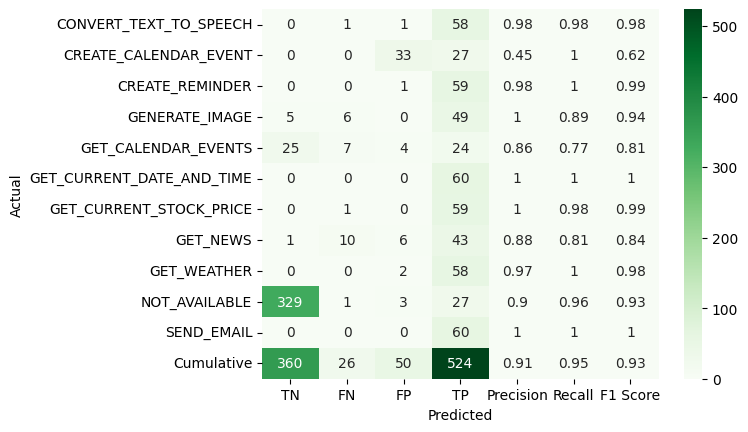

In [35]:
# Plot the confusion matrix
sns.heatmap(summary_aigen5_zeroshot, annot=True, cmap='Greens', fmt='g'), plt.xlabel('Predicted'), plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [36]:
# Generate the DataFrame to LaTeX format so that it can be copied and pasted into our thesis
# Formatting TN, FN, FP, and TP columns to 0 decimal places
for col in ['TN', 'FN', 'FP', 'TP']:
    summary_aigen5_zeroshot[col] = summary_aigen5_zeroshot[col].astype(int)

# Formatting the 'Precision', 'Recall', and 'F1 Score' columns to 2 decimal places
for col in ['Precision', 'Recall', 'F1 Score']:
    summary_aigen5_zeroshot[col] = summary_aigen5_zeroshot[col].round(2)

# Convert the DataFrame to LaTeX
latex_code = summary_aigen5_zeroshot.to_latex(float_format="%.2f")
print(latex_code)

\begin{tabular}{lrrrrrrr}
\toprule
 & TN & FN & FP & TP & Precision & Recall & F1 Score \\
APIs &  &  &  &  &  &  &  \\
\midrule
CONVERT_TEXT_TO_SPEECH & 0 & 1 & 1 & 58 & 0.98 & 0.98 & 0.98 \\
CREATE_CALENDAR_EVENT & 0 & 0 & 33 & 27 & 0.45 & 1.00 & 0.62 \\
CREATE_REMINDER & 0 & 0 & 1 & 59 & 0.98 & 1.00 & 0.99 \\
GENERATE_IMAGE & 5 & 6 & 0 & 49 & 1.00 & 0.89 & 0.94 \\
GET_CALENDAR_EVENTS & 25 & 7 & 4 & 24 & 0.86 & 0.77 & 0.81 \\
GET_CURRENT_DATE_AND_TIME & 0 & 0 & 0 & 60 & 1.00 & 1.00 & 1.00 \\
GET_CURRENT_STOCK_PRICE & 0 & 1 & 0 & 59 & 1.00 & 0.98 & 0.99 \\
GET_NEWS & 1 & 10 & 6 & 43 & 0.88 & 0.81 & 0.84 \\
GET_WEATHER & 0 & 0 & 2 & 58 & 0.97 & 1.00 & 0.98 \\
NOT_AVAILABLE & 329 & 1 & 3 & 27 & 0.90 & 0.96 & 0.93 \\
SEND_EMAIL & 0 & 0 & 0 & 60 & 1.00 & 1.00 & 1.00 \\
Cumulative & 360 & 26 & 50 & 524 & 0.91 & 0.95 & 0.93 \\
\bottomrule
\end{tabular}

